### classic and interesting Kaggle case[Titanic Problem](https://www.kaggle.com/c/titanic)
We all know『Jack and Rose』story，Titanic sank after colliding with iceberg，One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.some groups of people were more likely to survive than others, such as women, children, and the upper-class.<br>
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.<br>
This is a binary classification problem and many classifier can solve it.

**<font color=red>check data</font>**<br>
Using pandas to load data

In [2]:
# This ipython notebook describes how do I solve the Kaggle Titanic problem

import pandas as pd #data analytics
import numpy as np #scientific calculation
from pandas import Series,DataFrame
import os
os.chdir("/Users/songzhewei/Desktop/Data Science/python/Practice dataset/titanic")
data_train = pd.read_csv("Train.csv")
data_train.columns
#data_train[data_train.Cabin.notnull()]['Survived'].value_counts()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**<font color=red>Let's see our features</font>**<br>
PassengerId <br>
Pclass <br> 
Name <br>
Sex <br>
Age <br>
SibSp <br>
Parch <br>
Ticket <br>
Fare <br>
Cabin <br>
Embarked <br>

**<font color=red> let pandas to tell us some basic information<font>**

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<font color=red>What does data above tell us？It told us that there are 891 passengers, unfortunately，there are some features with missing value,like:<font><br>

* <font color=red>Age only has 714 passengers records<font>
* <font color=red>Cabin has only 204 known passengers' records<font>

<font color=red>Obviously，we can get some basic information by using the method below，get some distribution of numerical feature(cause some features，like name，are text；other features，like Embarked，is categorical, we can not use function "describe" to see their information)<font>

In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color=red>mean value tell us that about 0.383838 people were survived，2 or 3 class people more than 1 class people，the average age of passengers is 29.7(ignore missing value)…<font>

* <font color=red>『It is important to know your dataset！』<font>
* <font color=red>『It is important to know your dataset！』<font>
* <font color=red>『It is important to know your dataset！』<font>

<font color=red>Now we are going to mining some deep information of data<font><br>
<font color=red>observe each/multiple features relationship with Survived**<font>

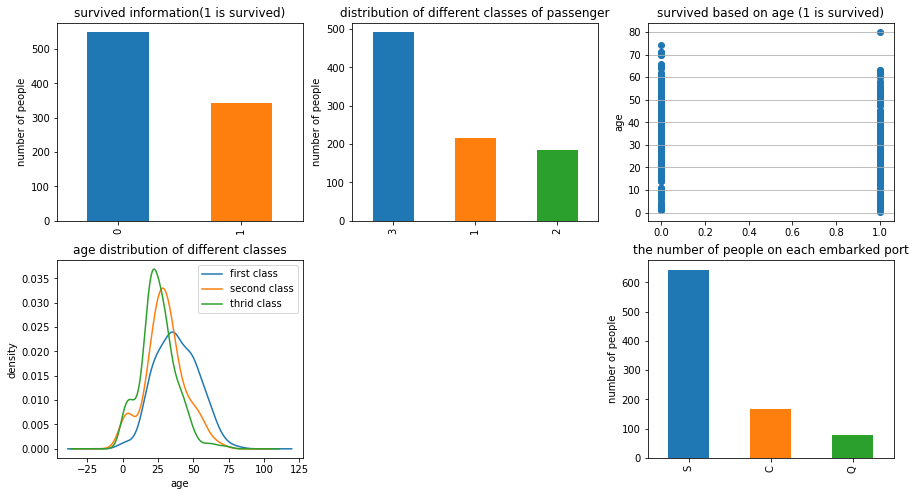

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # set graph color alpha parameter
plt.figure(num='astronaut',figsize=(15,8))  #create a window called astronaut,set size

plt.subplot(2,3,1)     #divide window into 6 subplots
#plt.subplot2grid((2,3),(0,0))      # divide a big graph area into multiple small areas
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"survived information(1 is survived)") # puts a title on our graph
plt.ylabel(u"number of people")  

plt.subplot(2,3,2)    
#plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"number of people")
plt.title(u"distribution of different classes of passenger")

plt.subplot(2,3,3)     
#subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"survived based on age (1 is survived)")


plt.subplot(2,3,4)     
#plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density") 
plt.title(u"age distribution of different classes")
plt.legend((u'first class', u'second class',u'thrid class'),loc='best') # sets our legend for our graph.


plt.subplot(2,3,6)     
#plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"the number of people on each embarked port")
plt.ylabel(u"number of people")  

plt.show()


then we get the graph below ：<br>
![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/8.png))

<font color=red>bingo，graph is more clear then text, and we can see from graph that:<font><br>
* <font color=red>300+ people survived，less than half of total number；<font><br>
* <font color=red>thrid class has the most passengers；survived and unsurvived people have same age distirbution<font><br>
* <font color=red>3 class passenger age trends are almost same，most 2/3 class passengers are around 20 years old，most 1 class passengers are around 40 years old<font><br>
* <font color=red>the number of people at embarked ports are decreased as S、C、Q，S embarked port people number is much more than others<font><br><br>

<font color=red>now we probably will have some thinkings<font><br><br>

1. <font color=red>different classes are related with passengers' fortune and social standing，it would effect their possibility of being rescued<font><br>
2. <font color=red>age is also related with possibility of survived<font><br>
3. <font color=red>whether there exist relationship between embarked and survived？maybe different port has different rescue rate？<font><br>

<font color=red>Let's see these features' statistical distirbution<font>

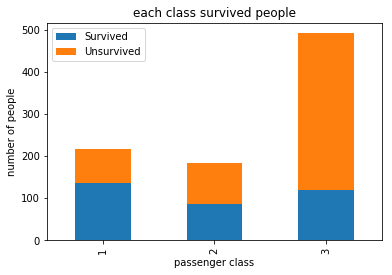

In [12]:
#Let's see each class survived people
fig = plt.figure()
fig.set(alpha=0.2)  # set graph  color alpha parameter

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"each class survived people")
plt.xlabel(u"passenger class") 
plt.ylabel(u"number of people") 

plt.show()

<font color=red>Obviously, class1 passengers have high possibility to be rescued, this is an important feature<font>

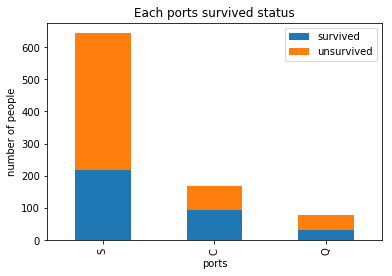

In [24]:
#see each embraked port survived status
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Each ports survived status")
plt.xlabel(u"ports") 
plt.ylabel(u"number of people") 

plt.show()

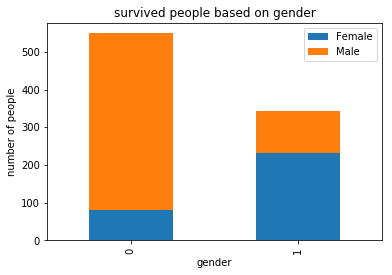

In [17]:
#Let's see people of different genders survived status
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'Male':Survived_m, u'Female':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title(u"survived people based on gender")
plt.xlabel(u"gender") 
plt.ylabel(u"number of people")
plt.show()

<font color=red>We can find "lady first" strategy<font><br>

<font color=red>specific version<font><br>

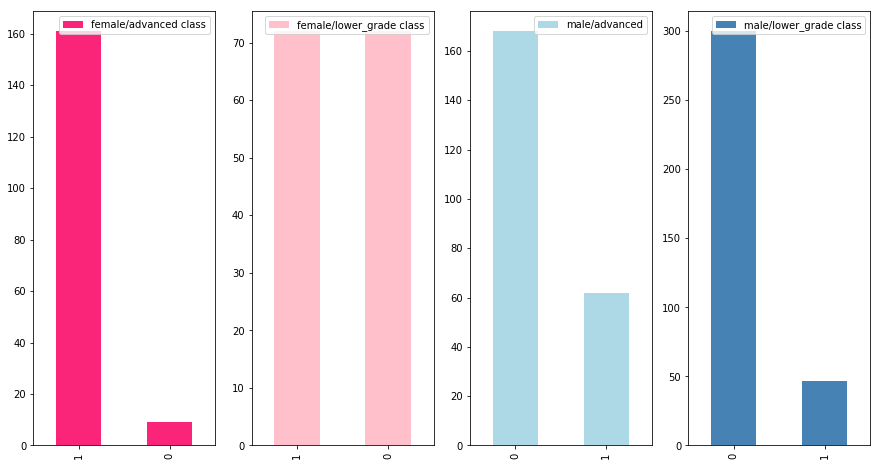

In [23]:
#Let's see different gender people survived status in different classes
fig=plt.figure()
fig.set(alpha=0.65) # set graph transparency

plt.figure(num='astronaut',figsize=(15,8)) 


plt.subplot(1,4,1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"survived", u"unsurvived"], rotation=0)
plt.legend([u"female/advanced class"], loc='best')

plt.subplot(1,4,2)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"unsurvived", u"survived"], rotation=0)
plt.legend([u"female/lower_grade class"], loc='best')

plt.subplot(1,4,3)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"unsurvived", u"survived"], rotation=0)
plt.legend([u"male/advanced"], loc='best')

plt.subplot(1,4,4)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"unsurvived", u"survived"], rotation=0)
plt.legend([u"male/lower_grade class"], loc='best')

plt.show()

<font color=red>What about people with siblings and parents<font>
<font color=red>Does big family have advantage of being survived<font><br>

In [25]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [26]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

<font color=red>So we didin't find any valuable information，we set them as alternative features<font><br>
<font color=red>Let's see ticket<font><br>
<font color=red>ticketID is unique, it might unrelated with outcome<font><br>
<font color=red>cabin has 204 records, we display it distribution first<font><br>

In [27]:
data_train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
F2                 3
E101               3
D                  3
C22 C26            3
B58 B60            2
E121               2
C93                2
E8                 2
B49                2
C92                2
E67                2
B22                2
B28                2
D36                2
C78                2
D26                2
C125               2
B18                2
B5                 2
D17                2
D20                2
E44                2
D33                2
B57 B59 B63 B66    2
C83                2
C124               2
                  ..
A31                1
C103               1
D47                1
B79                1
C32                1
T                  1
C46                1
E10                1
C95                1
D45                1
C82                1
E50                1
A34                1
B19                1
B3                 1
D6                 1
C128         

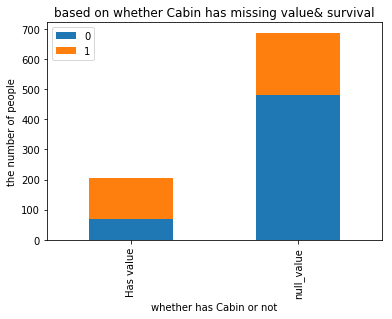

In [28]:
#cabin count value are so scattered，most of cabin only appear once, it feels that doesn't make any sense if we regard it as a categorical feature
#Let's see how it affect survival of passengers, cause it has many missing value
fig = plt.figure()
fig.set(alpha=0.2)  # set parameter of color alpha

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'Has value':Survived_cabin, u'null_value':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"based on whether Cabin has missing value& survival")
plt.xlabel(u"whether has Cabin or not") 
plt.ylabel(u"the number of people")
plt.show()

#It seems that people has cabin records have high possibility to survive，let's classify this feature into two: has cabin/non_cabin.

<font color=red>We start fromo more outstanding feature，yes，they are Cabin and Age，since missing value affects later works<font><br>

<font color=red>We just classify cabin as "Yes","no" based on whether they have value<font><br>

<font color=red>About Age：<font><br>

<font color=red>When we meet some missing value, we have some methods to solve it below<font><br>

1. <font color=red>If sample has hign percentage of missing value ，we probably should delete this feature，since if we use it as a feature, it would bring some noise for us<font><br>
2. <font color=red>If there are not so many missing value like less than half of sample，and it is non-continious value，we set NAN as a new category in this feature<font><br>
3. <font color=red>If there are not so many missing value like less than half of sample，and it is a continuious value ，we should consider to set a step(like "age" here，we can use 2 or 3 years old as a step)，and discrete it，then we use NaN as a type added into this categorical feature.<font><br>
4. <font color=red>In some situations，there are a few missing value，we can use existing value to fiiting the data and
 supplement missing value<font><br>
<font color=red>In this case，the last two methods are feasible for us，we can try fitting method first.<font><br>

<font color=red>We use RandomForest in scikit-learn to fit the missing value<font><br>

In [29]:
from sklearn.ensemble import RandomForestRegressor
 
### Use RandomForestClassifier supplement missing attribute
def set_missing_ages(df):
    
    # We put original numerical features into Random Forest Regressor
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # divide "age" into notnull and isnull
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y is target age
    y = known_age[:, 0]

    # X is feature value
    X = known_age[:, 1:]

    # fit into RandomForestRegressor
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # Use model we get to predict isnull value
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # supplement missing position by values we predicted 
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

/Users/songzhewei/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


<font color=red>Becasue in logistic regression，input features should be numerical value，we always have to do one-hot coding processing <font><br>
<font color=red>What is /one-hot编码？Taking an example：<font><br>

<font color=red>Use Embarked as an example，it is originally one attribute，the value are[‘S’,’C’,’Q‘]，we divide it into three: ’Embarked_C’,’Embarked_S’, ‘Embarked_Q’<font><br>

* <font color=red>If Embarked value are S，”Embarked_S” is 1，in ’Embarked_C’, ‘Embarked_Q’ the value should be 0<font><br>
* <font color=red>If Embarked value are C，”Embarked_C” is 1，’Embarked_S’, ‘Embarked_Q’value should be 0<font><br>
* <font color=red>If Embarked are Q，”Embarked_Q”set as 1，’Embarked_C’, ‘Embarked_S’ should be 0<font><br>

<font color=red> We use ”get_dummies” in pandas to do this work，and attach merge on ”data_train”<font><br>

In [30]:

dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [33]:
# Then we still need to do some data preprocessing job，like scaling，to scale some high-variance value into [-1,1]
# It can speed up logistic regression convergence
from sklearn import preprocessing
df['Age_scaled'] = preprocessing.scale(df['Age'])
df['Fare_scaled'] = preprocessing.scale(df['Fare'])
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [34]:
# we extract features we need to transform into numpy form，Use LogisticRegression in  scikit-learn to build model
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y is Survival result
y = train_np[:, 0]

# X are features we use
X = train_np[:, 1:]

# fit into RandomForestRegressor
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [35]:
X.shape

(891, 14)

Then we do same things on test data

In [37]:
data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# Do feature transform on test_data
# Use RandomForestRegressor to supplement missing value
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# predict age
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = preprocessing.scale(df_test['Age'])
df_test['Fare_scaled'] = preprocessing.scale(df_test['Fare'])
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [38]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [39]:
pd.read_csv("logistic_regression_predictions.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


<font color=red>0.76555，恩，结果还不错。毕竟，这只是我们简单分析过后出的一个baseline系统嘛</font>